In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
N = 10000
theta_values = [7, 15, 31]

def plot_estimation(estimate, color, label):
    delta_range = np.zeros(N)       
    for n in range(1, N):
        estimation = estimate(sample[:n])
        delta_range[n] = abs(theta - estimation)
    
    plt.plot(range(1, N), delta_range[1:N], color=color, label=label)


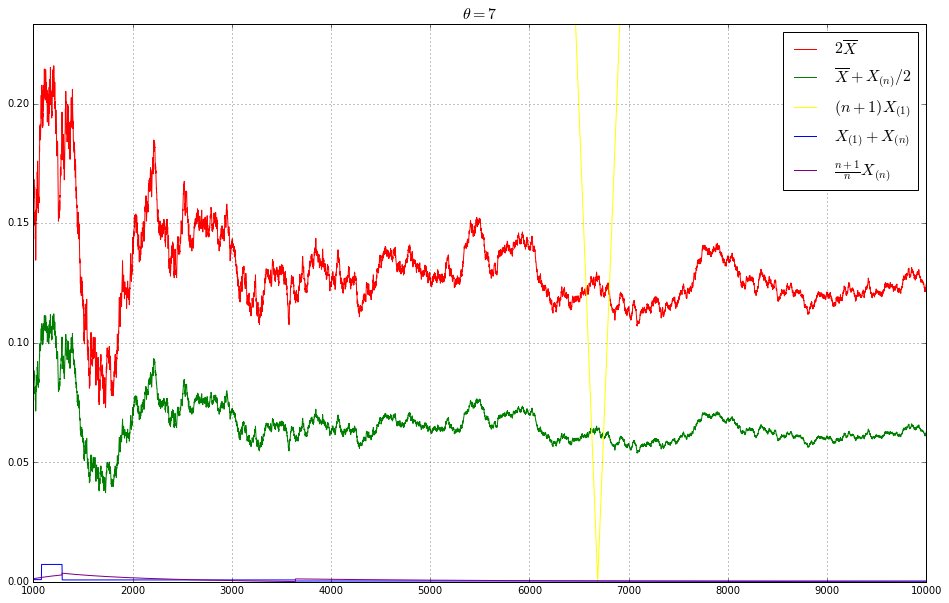

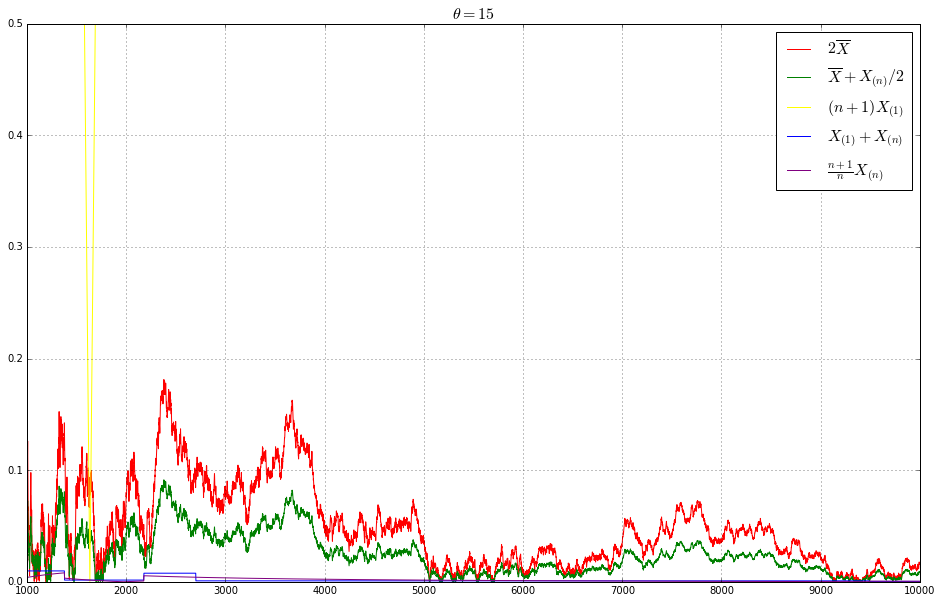

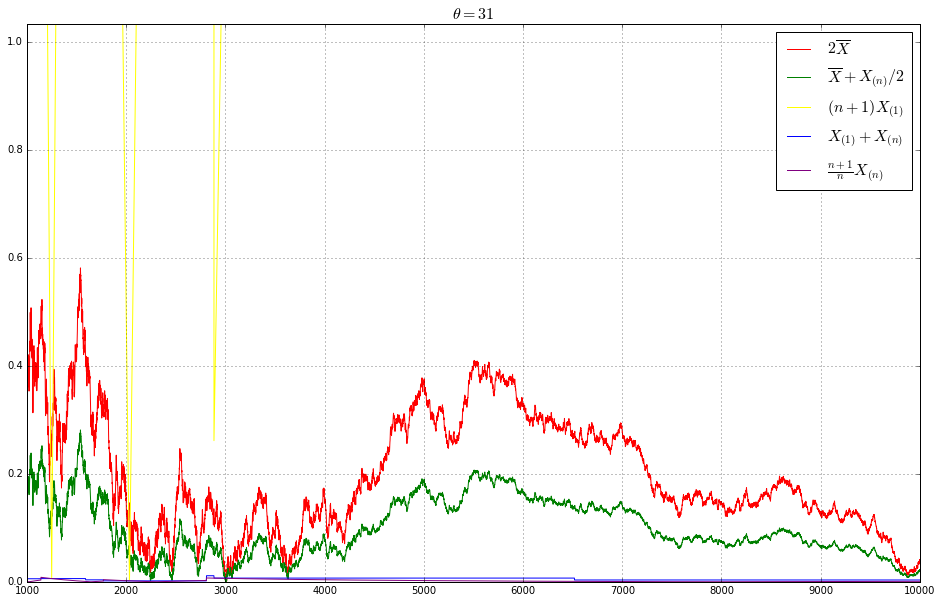

In [3]:
for theta in theta_values:
    plt.figure(figsize=(16, 10))
    plt.ylim(0, theta / 30)
    plt.xlim(1000, 10000)
    sample = sps.uniform.rvs(loc=0, scale=theta, size=N)
    
    plot_estimation(lambda s : 2 * s.mean(), 'red', r'$2\overline{X}$')
    plot_estimation(lambda s : s.mean() + s.max() / 2, 'green', r'$\overline{X}+X_{(n)}/2$')
    plot_estimation(lambda s : (s.size + 1) * s.min(), 'yellow', r'$(n + 1)X_{(1)}$')
    plot_estimation(lambda s : s.max() + s.min(), 'blue', r'$X_{(1)}+X_{(n)}$')
    plot_estimation(lambda s : (s.size + 1) / s.size * s.max(), 'purple', r'$\frac{n+1}{n}X_{(n)}$')
    
    plt.grid()
    plt.title(r'$\theta=' + str(theta) + r'$', fontsize=16)
    plt.legend(fontsize=16)
    plt.show()
    #plt.savefig("theta-" + str(theta) + ".pdf")
    

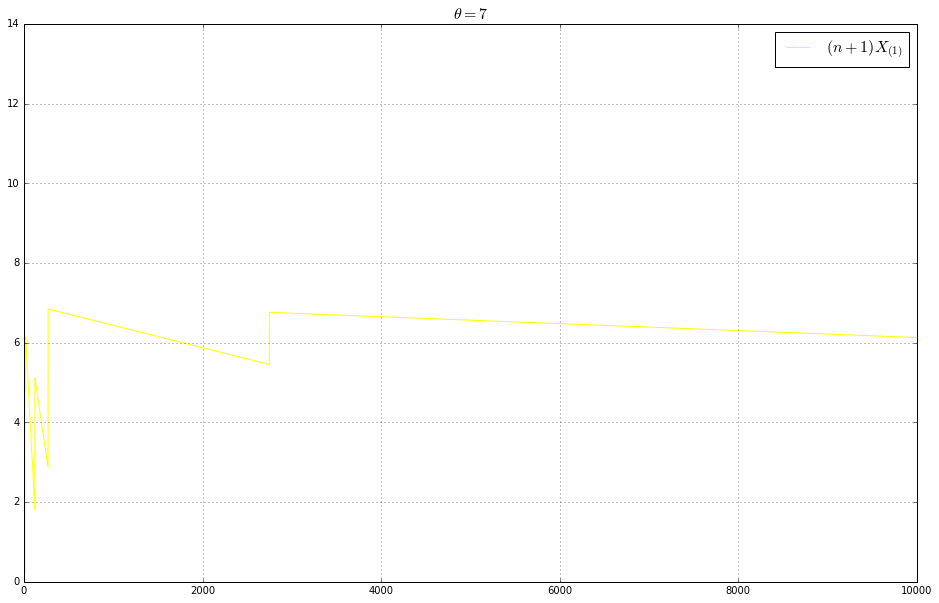

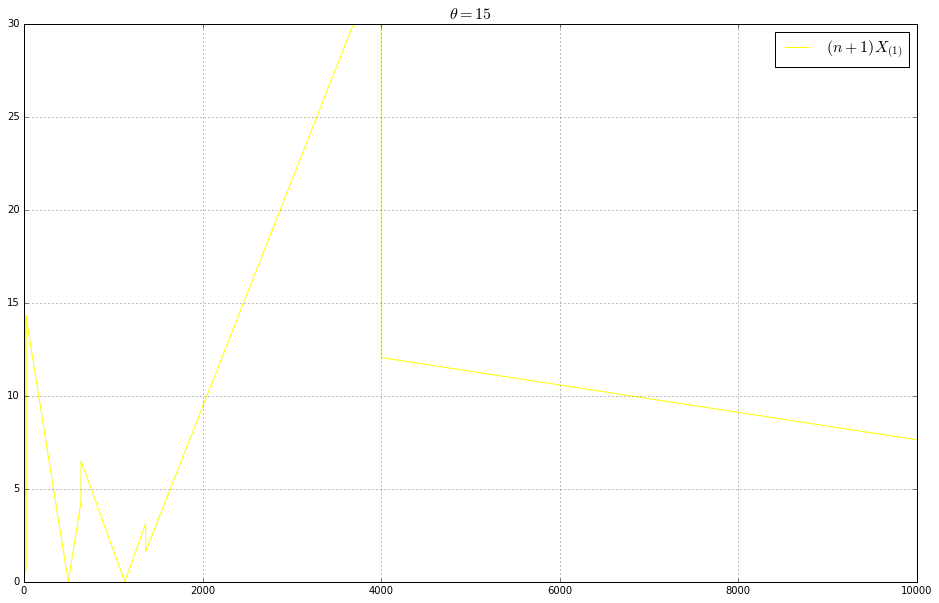

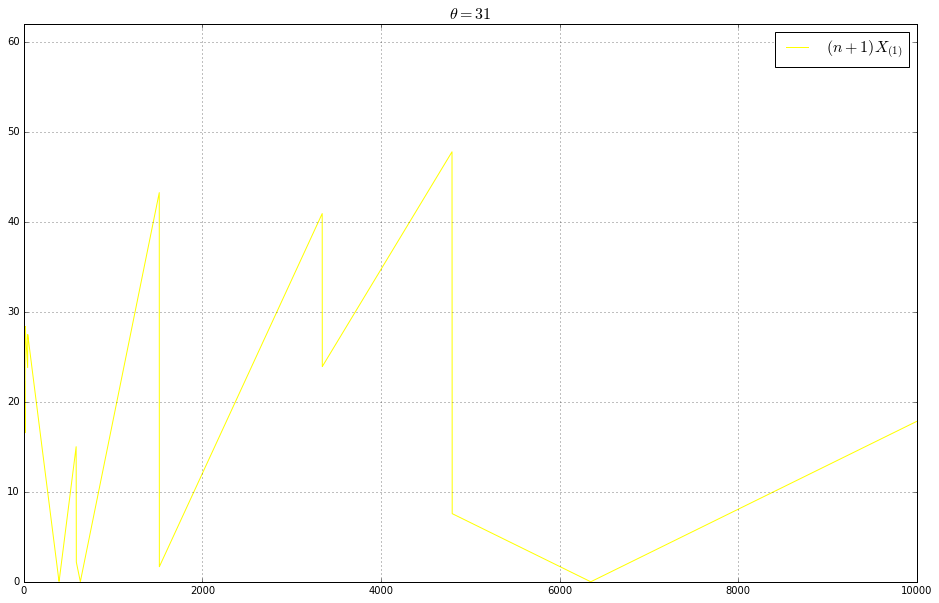

In [4]:
for theta in theta_values:
    plt.figure(figsize=(16, 10))
    plt.ylim(0, 2 * theta)
    sample = sps.uniform.rvs(loc=0, scale=theta, size=N)
    
    plot_estimation(lambda s : (s.size + 1) * s.min(), 'yellow', r'$(n + 1)X_{(1)}$')
    
    plt.grid()
    plt.title(r'$\theta=' + str(theta) + r'$', fontsize=16)
    plt.legend(fontsize=16)
    plt.show()
    #plt.savefig("theta-" + str(theta) + "-bad-estimation" + ".pdf")
